### convert pages of pdf into jpg format image

In [25]:
import fitz
import os

BASE_DIR = os.environ.get("BASE_DIR", ".")
filename = "data/1706.03762.pdf"
pdf_path = os.path.join(BASE_DIR, filename)
doc = fitz.open(filename)
for i, page in enumerate(doc.pages()):
    pix = page.get_pixmap()
    image_path = os.path.join(BASE_DIR, f"./images/test_{i}.jpg")
    pix.save(image_path, output="jpg")

### test ImageProcessor module

In [64]:
from preprocessing import ImageProcessor

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
base_dir = '.'
image_path = os.path.join(base_dir, "images/test_0.jpg")
processor = ImageProcessor(image_path)

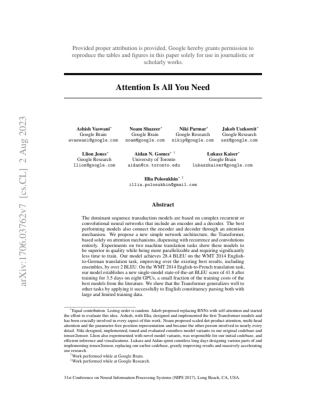

In [66]:
gray = processor.get_gray_scale()
processor.display_image(gray)

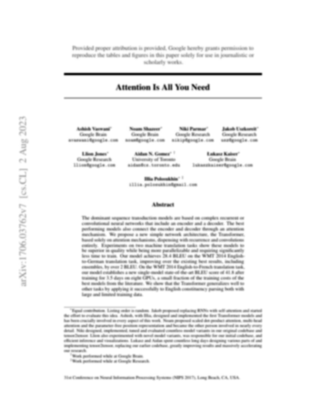

In [67]:
blur = processor.get_blur((7, 7), gray)
processor.display_image(blur)

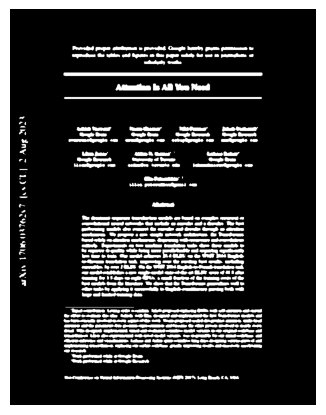

In [68]:
thresh = processor.get_threshold((0, 300), blur)
processor.display_image(thresh)

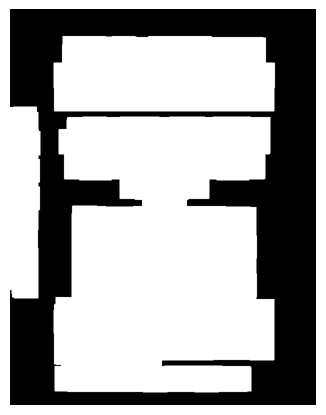

In [69]:
dilate = processor.get_dilate((10, 10), iterations=5, in_image=thresh)
processor.display_image(dilate)

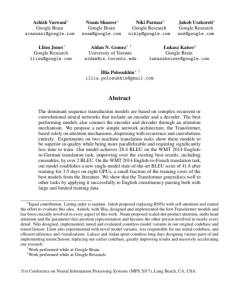

In [70]:
result, roi = processor.get_segment(dilate)
processor.display_image(roi[-1][0])

### process and save all pages of pdf

In [74]:
for i in range(doc.page_count):
    image_path = os.path.join(base_dir, f'images/test_{i}.jpg')
    processor = ImageProcessor(image_path)
    gray = processor.get_gray_scale()
    blur = processor.get_blur((7, 7), gray)
    thresh = processor.get_threshold((0, 300), blur)
    dilate = processor.get_dilate((13, 13), iterations=5,in_image=thresh)
    result, roi = processor.get_segment(dilate)

    image_path = os.path.join(base_dir, f'images/test_{i}_processed.jpg')
    processor.save_image(image_path, roi[0][0])